<a href="https://colab.research.google.com/github/FedyaBadyilo/nonparametric-Bayesian-classifiers/blob/main/%D0%BD%D0%B5%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ВВЕДЕНИЕ**

Цель и задачи исследования:
в рамках данной исследовательской работы была поставлена цель обучить непараметрические байесовские классификаторы, провести анализ их показателей эффективности и сравнить полученные результаты с другими моделями классификации. Основными задачами исследования были изучение принципов работы непараметрических байесовских классификаторов, проведение анализа их применимости в реальных задачах классификации, а также оценка и сравнение их производительности с другими моделями.

Обоснование актуальности выбора непараметрических байесовских классификаторов:
выбор непараметрических байесовских классификаторов обусловлен их способностью обучаться на данных без явного задания параметров модели. Эти классификаторы основаны на байесовской статистике, что позволяет учитывать априорное знание о данных и улучшать результаты классификации. В контексте быстро меняющихся данных и задач машинного обучения, непараметрические методы могут быть эффективным инструментом для решения сложных задач классификации.

# **ТЕОРЕТИЧЕСКОЕ ОБОСНОВАНИЕ**

1. Обзор основных принципов байесовского классификатора:
   Байесовский классификатор - это вероятностный метод классификации, основанный на принципе максимума апостериорной вероятности. При принятии решения о принадлежности объекта определенному классу, байесовский классификатор использует априорные вероятности и условные вероятности признаков для вычисления апостериорной вероятности принадлежности объекта к классу. Апостериорная вероятность вычисляется по формуле Байеса. Байесовский классификатор можно применять как для бинарной, так и для многоклассовой классификации.

2. Описание непараметрических методов обучения моделей:
   Непараметрические методы обучения моделей не предполагают строгих предположений о распределении данных и об их структуре. Эти методы могут учиться непосредственно на данных, без необходимости предварительно задавать параметры модели. Непараметрические методы могут быть эффективны в случае сложных или нестандартных структур данных, но могут иметь высокую вычислительную сложность и требовать больших объемов данных для обучения.


# **МЕТОДОЛОГИЯ**

1. Описание набора данных для обучения и тестирования модели:
Для задачи многоклассовой классификации была сгенерирована выборка с помощью метода multivariate_normal из библиотеки numpy, позволяющего получить массив многомерных нормальных значений. В наборе данных всего два признака: Feature 1 и Feature 2, а также три класса:  class 1, class 2, class 3.

2. Методы, которые использовались для анализа:
*   Статистический анализ: множественный анализ.
*   Визуализация данных: создание диаграмм, графиков, гистограмм, ROC-кривых, PR-кривых и прочих графических представлений данных.
*   Машинное обучение: обучение с учителем (непараметрический байесовский классификатор, параметричкеский байесовский классификатор, логистическая регрессия).

### Создание выборки
Для генерации выборки была создана функция generator, принимающая в качестве аргумента количество элементов выборки и возвращающая выборку из трех классов и двух признаков.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
def generator(N):
    np.random.seed(42)
    N = N
    class_1 = np.random.multivariate_normal(mean=[2.5, 2], cov=[[-0.7, 1], [1, -0.7]], size=int(N*0.4))
    class_2 = np.random.multivariate_normal(mean=[3.9, 2.2], cov=[[1, 0.7], [0.7, 1]], size=int(N*0.35))
    class_3 = np.random.multivariate_normal(mean=[0.5, 4], cov=[[0.2, 0], [0, 0.2]], size=int(N*0.25))

    return np.vstack([class_1, class_2, class_3]), np.hstack([np.zeros(int(N*0.4)), np.ones(int(N*0.35)), np.full(int(N*0.25), 2)])

X, y = generator(1000)

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

df.head(3)

,Feature 1,Feature 2,Target
0,2.904398,1.488503,0.0
1,3.687006,1.992728,0.0
2,2.193440,2.125198,0.0


In [ ]:
df.describe()

,Feature 1,Feature 2,Target
count,1000.000000,1000.000000,1000.000000
mean,2.422782,2.558562,0.850000
std,1.508774,1.222070,0.792545
min,-0.885044,-0.857198,0.000000
25%,1.023004,1.633721,0.000000
50%,2.524125,2.493342,1.000000
75%,3.576468,3.624718,1.250000
max,6.086597,5.428001,2.000000


# РАЗВЕДОЧНЫЙ АНАЛИЗ



*   Построение гистограмм распределения признаков в каждом классе
*   Построение диаграмм рассеяния и box-and-whisker
*   Оценка статистических характеристик выборки
*   Оценка нормальности распределения данных


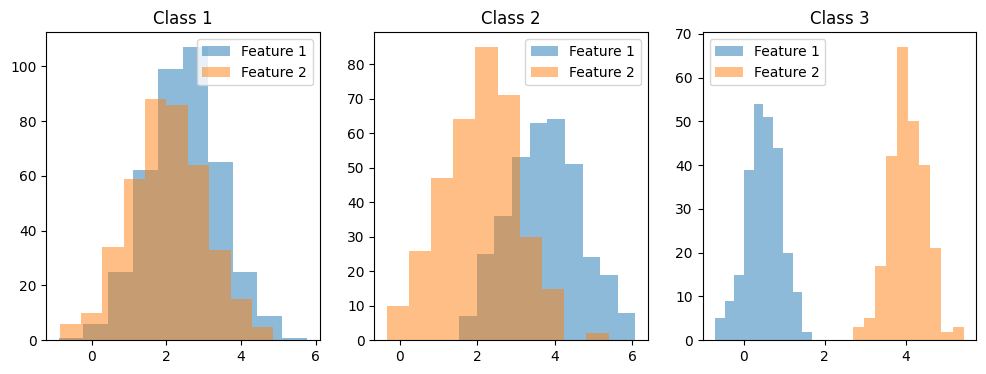

In [ ]:
plt.figure(figsize=(12, 4))
for class_label in (0, 1, 2):
    plt.subplot(1, 3, int(class_label + 1))
    plt.hist(df[df['Target'] == class_label]['Feature 1'], alpha=0.5, label='Feature 1')
    plt.hist(df[df['Target'] == class_label]['Feature 2'], alpha=0.5, label='Feature 2')
    plt.title(f'Class {int(class_label + 1)}')
    plt.legend()
plt.show()

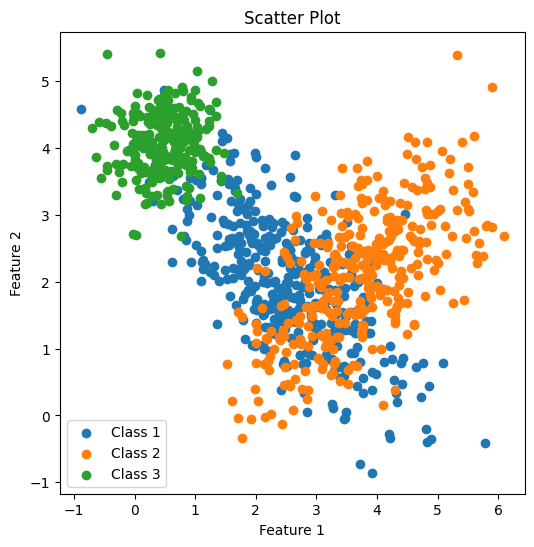

In [ ]:
plt.figure(figsize=(6, 6))
for class_label in (0, 1, 2):
    plt.scatter(df[df['Target'] == class_label]['Feature 1'], df[df['Target'] == class_label]['Feature 2'], label=f'Class {class_label + 1}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot')
plt.legend()
plt.show()

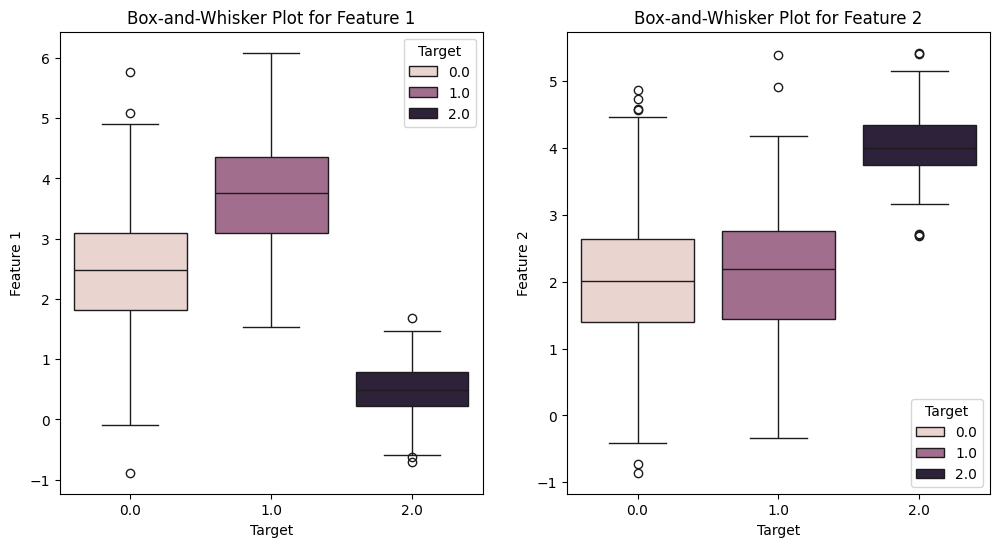

In [ ]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['Feature 1', 'Feature 2']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='Target', y=feature, data=df, hue='Target')
    plt.title(f'Box-and-Whisker Plot for {feature}')
plt.show()

# **ПРЕДОБРАБОТКА ДАННЫХ**

* Устраниние выбросов с помощью метода межквантильного диапозона (Элемент считается выбросом, если он в 1,5 раза превышает межквартильный размах, превышающий третий квартиль (Q3), или в 1,5 раза превышает межквартильный размах, меньше первого квартиля (Q1)) - выбросов обнаружено не было.
* Приведение к нормальному распределению с помощью метода StandardScaler из библиотеки sklearn.

In [ ]:
Q1 = df[['Feature 1', 'Feature 2']].quantile(0.25)
Q3 = df[['Feature 1', 'Feature 2']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Feature 1', 'Feature 2']] < (Q1 - 1.5 * IQR)) | (df[['Feature 1', 'Feature 2']] > (Q3 + 1.5 * IQR))).any(axis=1)]

df.describe()

,Feature 1,Feature 2,Target
count,1000.000000,1000.000000,1000.000000
mean,2.422782,2.558562,0.850000
std,1.508774,1.222070,0.792545
min,-0.885044,-0.857198,0.000000
25%,1.023004,1.633721,0.000000
50%,2.524125,2.493342,1.000000
75%,3.576468,3.624718,1.250000
max,6.086597,5.428001,2.000000


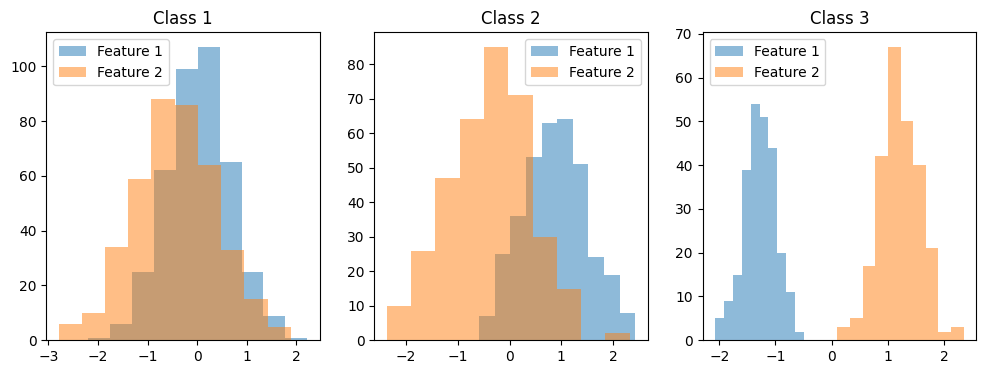

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Feature 1', 'Feature 2']] = scaler.fit_transform(df[['Feature 1', 'Feature 2']])

plt.figure(figsize=(12, 4))
for class_label in (0, 1, 2):
    plt.subplot(1, 3, int(class_label + 1))
    plt.hist(df[df['Target'] == class_label]['Feature 1'], alpha=0.5, label='Feature 1')
    plt.hist(df[df['Target'] == class_label]['Feature 2'], alpha=0.5, label='Feature 2')
    plt.title(f'Class {int(class_label + 1)}')
    plt.legend()
plt.show()

# **ОБУЧЕНИЕ МОДЕЛИ НЕПАРАМЕТРИЧЕСКИХ БАЙЕСОВСКИХ КЛАССИФИКАТОРОВ**
 Для обучения непараметрических байесовских классификаторов был использован метод KernelDensity из библиотеки sklearn. С помощью данного метода было обучено по 3 модели для каджого класса для каждого из 4-х парзеновских окон: прямоугольного окна; гауссова окна; окна Епанечникова; треугольного окна. Ширина окон была определена по правилу Сильвермана.

 Примечание: зачастую в выводе программы и на графиках названия парзеновских окон будут на английском в следующем соответствии:


*   Прямоугольное - Rectangle
*   Гауссовское - Gaussian
*   Епанечникова - Epanechnikov
*   Треугольного - Triangular







In [ ]:
from sklearn.neighbors import KernelDensity
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

X = np.array(df[['Feature 1', 'Feature 2']])
y = np.array(df['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
bandwidth = np.std(X) * (4/3/len(X)) ** 0.2

kde_models = {}
kernels = ['tophat', 'gaussian', 'epanechnikov', 'exponential']
labels = ['Rectangle', 'Gaussian', 'Epanechnikov', 'Triangular']

for kernel, label in zip(kernels, labels):
    kde_models[label] = {}
    for c in range(3):
        kde_models[label][c] = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(X_train[y_train == c])

### Пункт 1. Построение графиков плотностей.
Построение графиков восстановленных одномерных плотностей распределения каждого признака для каждого класса с использованием: прямоугольного окна; гауссовского окна; окна Епанечникова; треугольного окна.

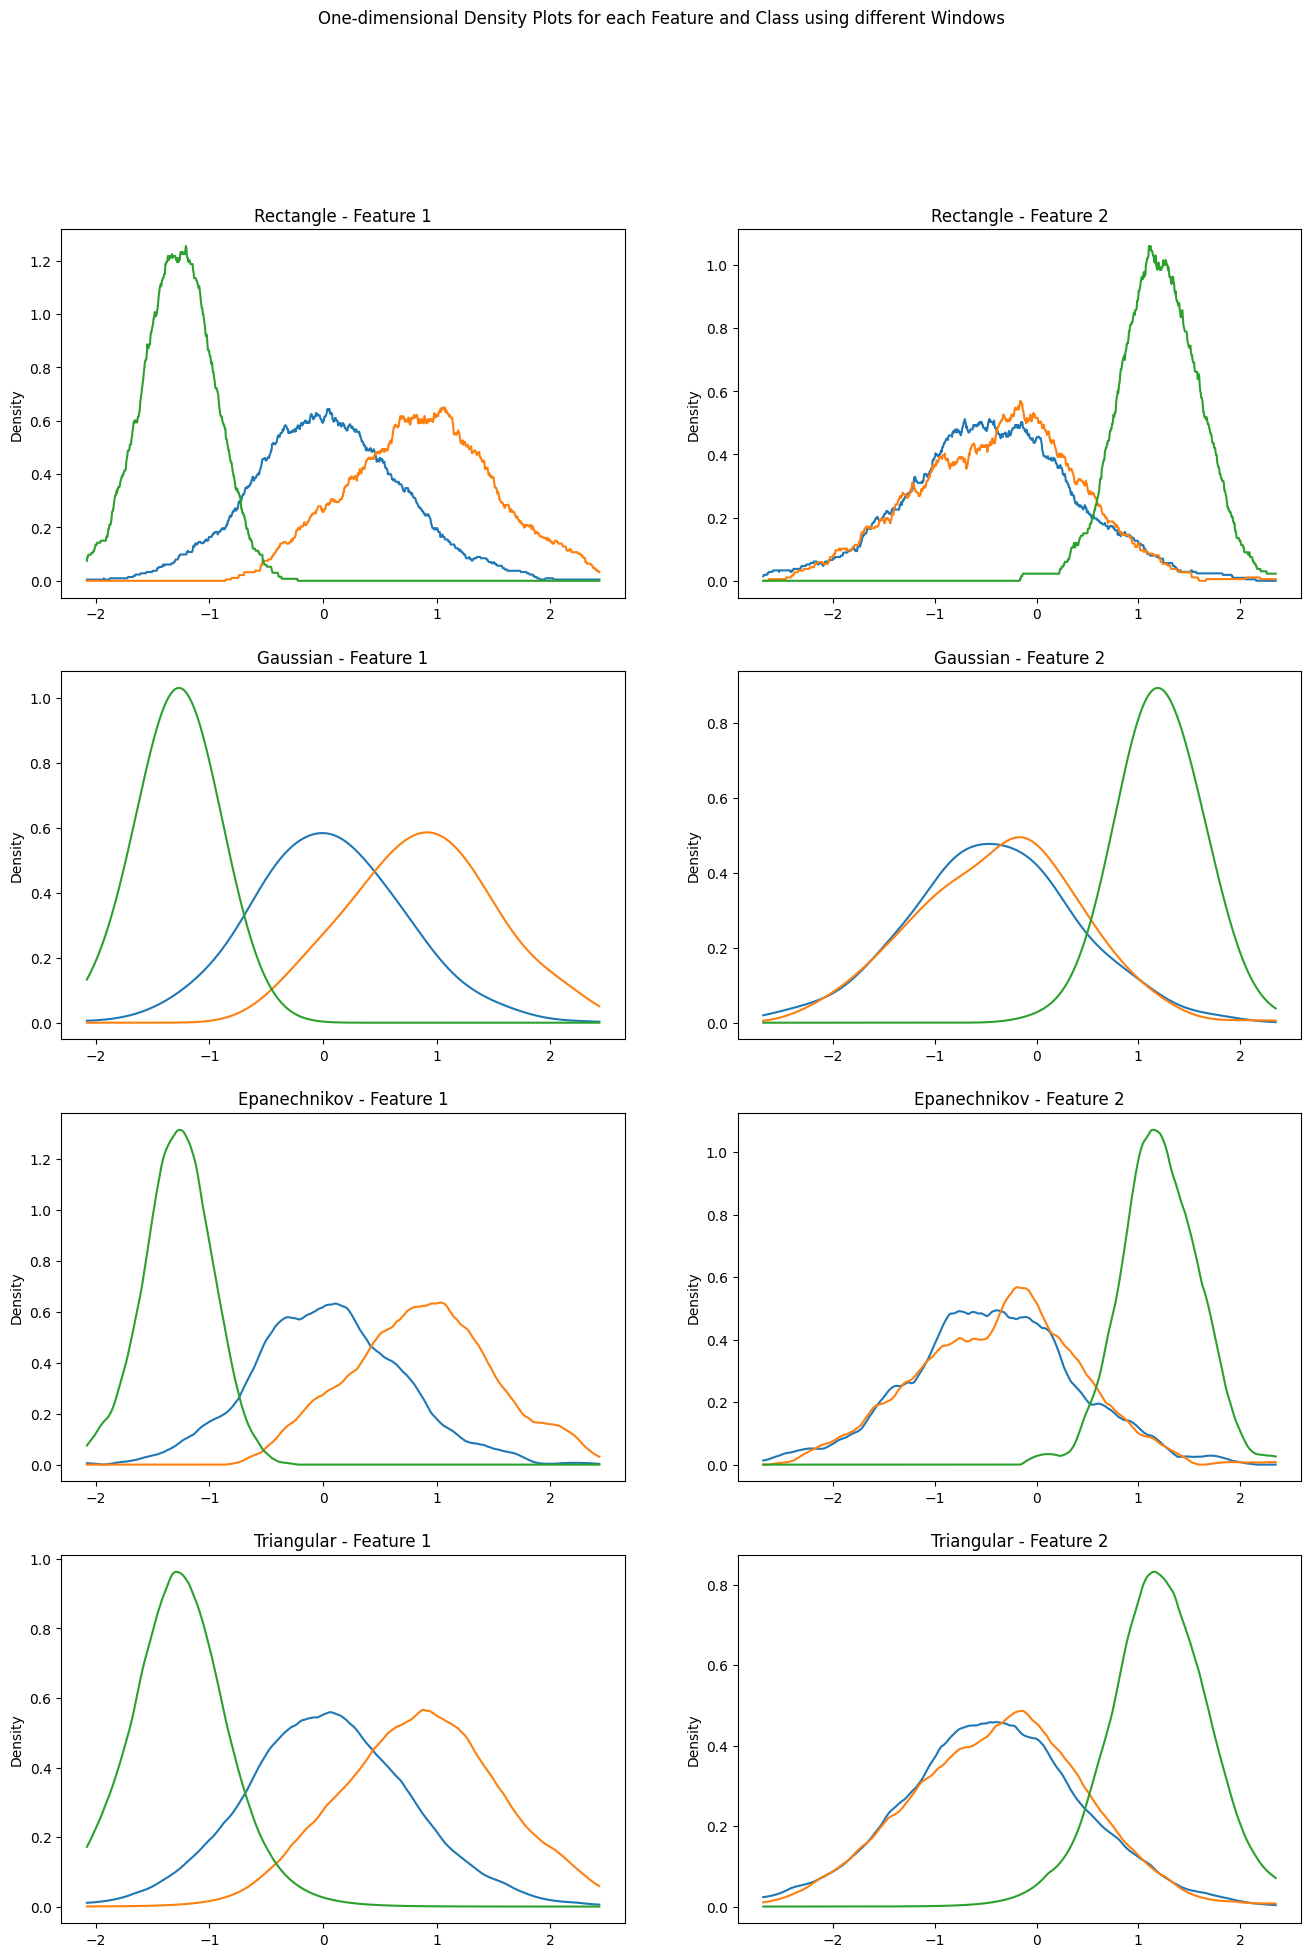

In [ ]:
counter = 0
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 22))
for model in kde_models:
    for i in range(2):
        for c in range(3):
            kde = kde_models[model][c]
            kde.fit(X[y==c][:, i][:, None])
            x = np.linspace(X_train[:, i].min(), X_train[:, i].max(), 1000)[:, None]
            log_dens = kde.score_samples(x)

            ax[counter, i].plot(x, np.exp(log_dens), label='Class '+str(c))
            ax[counter, i].set_title(f'{model} - Feature {i + 1}')
            ax[counter, i].set_ylabel('Density')

    counter += 1

fig.suptitle('One-dimensional Density Plots for each Feature and Class using different Windows')
plt.show()

### Пункт 2. Рассчет среднего значения и среднеквадратичного отклонения для метрики accuracy.
Далее для удобства был создан класс KernelDensity_predicter, который принимает словарь из трех обученных моделей для каждого из 3-х классов выборки, включающий в себя следующие методы:

*   predict_class_array - принимает двумерный массив данных с признаками и возвращает одномерный массив с предсказанными классами;
*    predict_proba - принимает двумерный массив данных с признаками и возвращает двумерный, отчищенный от значений континуума и с переведением логарифмических вероятностей к обычным, массив с вероятностями пренадлежности к одному из трех классов.

In [ ]:
class KernelDensity_predicter():
    def __init__(self, window):
        self.window = window

    def predict_class_array(self, array=None):
        def predict_class_point(window, new_point=None):
            log_likelihoods = [window[kde].score_samples(new_point.reshape(1, -1)) for kde in window]
            return np.argmax(log_likelihoods)
        return np.array([predict_class_point(self.window, new_point = point) for point in array])

    def predict_proba(self, array = None):
        def predict_proba_point(window, new_point=None):
            return [window[kde].score_samples(new_point.reshape(1, -1))[0] for kde in window]
        probabilities = np.array([predict_proba_point(self.window, new_point = point) for point in array])
        probabilities[probabilities == -np.inf] = probabilities[probabilities != -np.inf].min()
        probabilities = np.array(list(map(lambda x: np.e**x, probabilities)))
        return probabilities

window_predictors = {name[1]: KernelDensity_predicter({c: KernelDensity(bandwidth=bandwidth, kernel=name[0]).fit(X_train[y_train == c]) for c in range(3)}) for name in zip(kernels, labels)}

Рассчет среднего значения и с.к.о. (по фолдам кросс-валидации) точности (accuracy) обученного непараметрического байесовского классификатора на обучающей и тестовой выборках для каждого из парзеновских окон. Для разбиения выборки по фолдам использовался метод KFold из библиотеки sklearn, а для выичления метрики accuracy - метод accuracy_score из библиотеки sklearn.

In [ ]:
from sklearn.metrics import accuracy_score
scores = {}

kfold = KFold(n_splits = 5, shuffle = True, random_state=42)

for label, kernel in zip(labels, kernels):
    accuracy_scores = []

    for train, test in kfold.split(X):
        model = KernelDensity_predicter({c: KernelDensity(bandwidth=bandwidth, kernel=kernel).fit(X[train][y[train] == c]) for c in range(3)})
        accuracy_scores.append(accuracy_score(y[test], model.predict_class_array(X[test])))
    scores[label] = {'mean': np.mean(accuracy_scores), 'std': np.std(accuracy_scores)}

for model, result in zip(scores, scores.values()):
  print(f'тип окна: {model} | среднее: {result["mean"]} | с.к.о.: {result["std"]}')

тип окна: Rectangle | среднее: 0.779 | с.к.о.: 0.030232432915661973
тип окна: Gaussian | среднее: 0.8119999999999999 | с.к.о.: 0.033256578296631756
тип окна: Epanechnikov | среднее: 0.7919999999999999 | с.к.о.: 0.03944616584663203
тип окна: Triangular | среднее: 0.8039999999999999 | с.к.о.: 0.03512833614050057


### Пункт 3. Построение графиков зависимости среднего значения и с.к.о.  accuracy для разных значений ширины парзеновского окна.

В качестве лямбда (ширина парзеновского окна) были взяты следующие значения: 0.001, 0.1, 0.5, 1.0, 1.5, 2.0

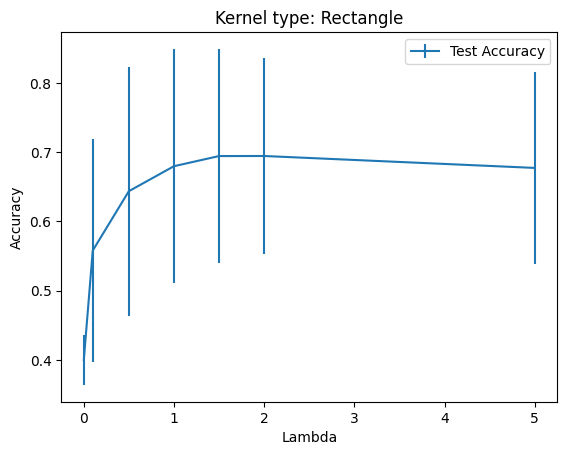

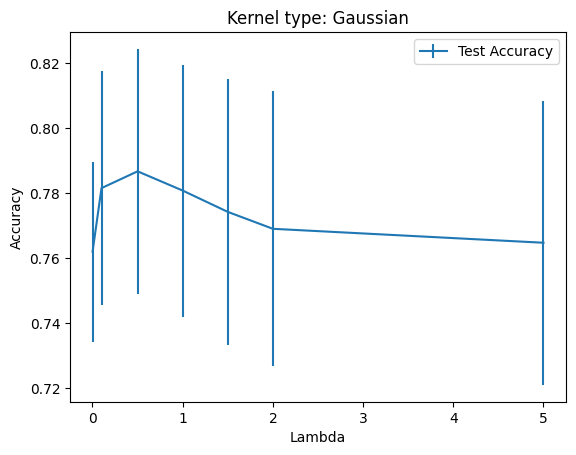

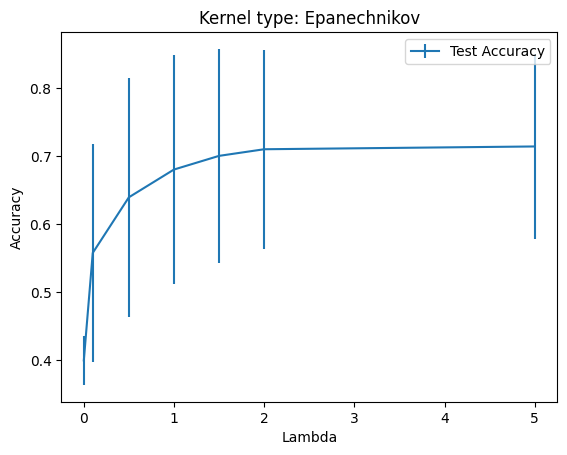

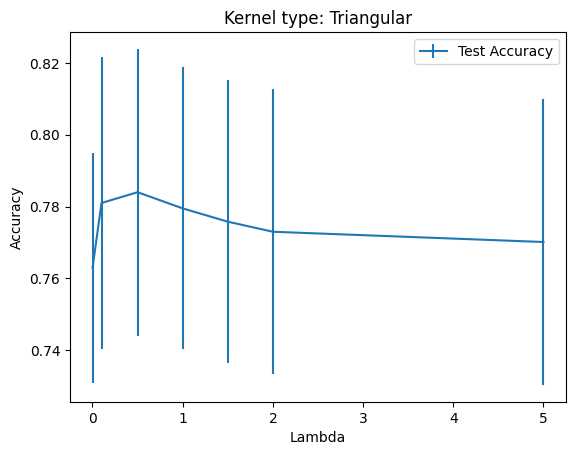

In [ ]:
for label, kernel in zip(labels, kernels):
    lambdas = [0.001, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0]
    means, stds = [], []
    accuracy_scores = []

    for lambd in lambdas:
        for train, test in kfold.split(X):
            model = KernelDensity_predicter({c: KernelDensity(bandwidth=lambd, kernel=kernel).fit(X[train][y[train] == c]) for c in range(3)})
            accuracy_scores.append(accuracy_score(y[test], model.predict_class_array(X[test])))
        means.append(np.mean(accuracy_scores))
        stds.append(np.std(accuracy_scores))

    plt.errorbar(lambdas, means, yerr=stds, label='Test Accuracy')
    plt.xlabel('Lambda')
    plt.ylabel('Accuracy')
    plt.title(f'Kernel type: {label}')
    plt.legend()
    plt.show()

Выведение всех числовых значений среднего и стандартного отклонения accuracy для каждого значения lambda для каждго типа окна

In [ ]:
max_mean = 0
best_res = {}
best_res_each_kernel = {label: {} for label in labels}
for label, kernel in zip(labels, kernels):
    max_mean_label = 0
    lambdas = [0.001, 0.1, 0.5, 1.0, 1.5, 2.0]
    means, stds = [], []
    accuracy_scores = []

    for lambd in lambdas:
        for train, test in kfold.split(X):
            model = KernelDensity_predicter({c: KernelDensity(bandwidth=lambd, kernel=kernel).fit(X[train][y[train] == c]) for c in range(3)})
            accuracy_scores.append(accuracy_score(y[test], model.predict_class_array(X[test])))

        if max_mean < np.mean(accuracy_scores):
            max_mean = np.mean(accuracy_scores)
            best_res['KERNEL TYPE'] = label
            best_res['LAMBDA'] = lambd
            best_res['MEAN'] = max_mean
            best_res['STD'] = np.std(accuracy_scores)


        if max_mean_label < np.mean(accuracy_scores):
            max_mean_label = np.mean(accuracy_scores)
            best_res_each_kernel[label]['LAMBDA'] = lambd
            best_res_each_kernel[label]['MEAN'] = max_mean
            best_res_each_kernel[label]['STD'] = np.std(accuracy_scores)


        print(f'KERNEL TYPE: {label} | LAMBDA: {lambd} | MEAN: {np.mean(accuracy_scores)} | STD: {np.std(accuracy_scores)}')


KERNEL TYPE: Rectangle | LAMBDA: 0.001 | MEAN: 0.4 | STD: 0.03605551275463988
KERNEL TYPE: Rectangle | LAMBDA: 0.1 | MEAN: 0.5579999999999999 | STD: 0.16040885262353818
KERNEL TYPE: Rectangle | LAMBDA: 0.5 | MEAN: 0.6436666666666666 | STD: 0.17955005492124532
KERNEL TYPE: Rectangle | LAMBDA: 1.0 | MEAN: 0.6797499999999999 | STD: 0.16878592210252605
KERNEL TYPE: Rectangle | LAMBDA: 1.5 | MEAN: 0.6944 | STD: 0.15470824153871052
KERNEL TYPE: Rectangle | LAMBDA: 2.0 | MEAN: 0.6945 | STD: 0.14203491354827752
KERNEL TYPE: Gaussian | LAMBDA: 0.001 | MEAN: 0.7619999999999999 | STD: 0.02767670500619612
KERNEL TYPE: Gaussian | LAMBDA: 0.1 | MEAN: 0.7815000000000001 | STD: 0.035989581825856216
KERNEL TYPE: Gaussian | LAMBDA: 0.5 | MEAN: 0.7866666666666666 | STD: 0.03762386949205989
KERNEL TYPE: Gaussian | LAMBDA: 1.0 | MEAN: 0.78075 | STD: 0.03873870803214789
KERNEL TYPE: Gaussian | LAMBDA: 1.5 | MEAN: 0.7742 | STD: 0.0409067231638028
KERNEL TYPE: Gaussian | LAMBDA: 2.0 | MEAN: 0.7690000000000001

Ширина окна для каждого типа парзеновского окна, при которой байесовский классификатор обладает наибольшей обобщающей способностью. Среди всех окон наилучшим образом себя покзазало гауссово окно со средним значением accuracy 0.786 и средним квадратичным отклонением accuracy 0.037

In [ ]:
for label in labels:
  print(f'KERNEL TYPE: {label} | LAMBDA: {best_res_each_kernel[label]["LAMBDA"]} | MEAN: {best_res_each_kernel[label]["MEAN"]} | STD: {best_res_each_kernel[label]["STD"]}')

KERNEL TYPE: Rectangle | LAMBDA: 2.0 | MEAN: 0.6945 | STD: 0.14203491354827752
KERNEL TYPE: Gaussian | LAMBDA: 0.5 | MEAN: 0.7866666666666666 | STD: 0.03762386949205989
KERNEL TYPE: Epanechnikov | LAMBDA: 2.0 | MEAN: 0.7866666666666666 | STD: 0.14591626213536157
KERNEL TYPE: Triangular | LAMBDA: 0.5 | MEAN: 0.7866666666666666 | STD: 0.0398831626963894


### Пункт 4. Изображение областей классов, формируемых каждым из обученных классификаторов.

Помимо областей классов, формируемых каждым из обученных классификаторов, тажке на графики были нанесены границы классов и данные из обучающей и тестовой выборок.


In [ ]:
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

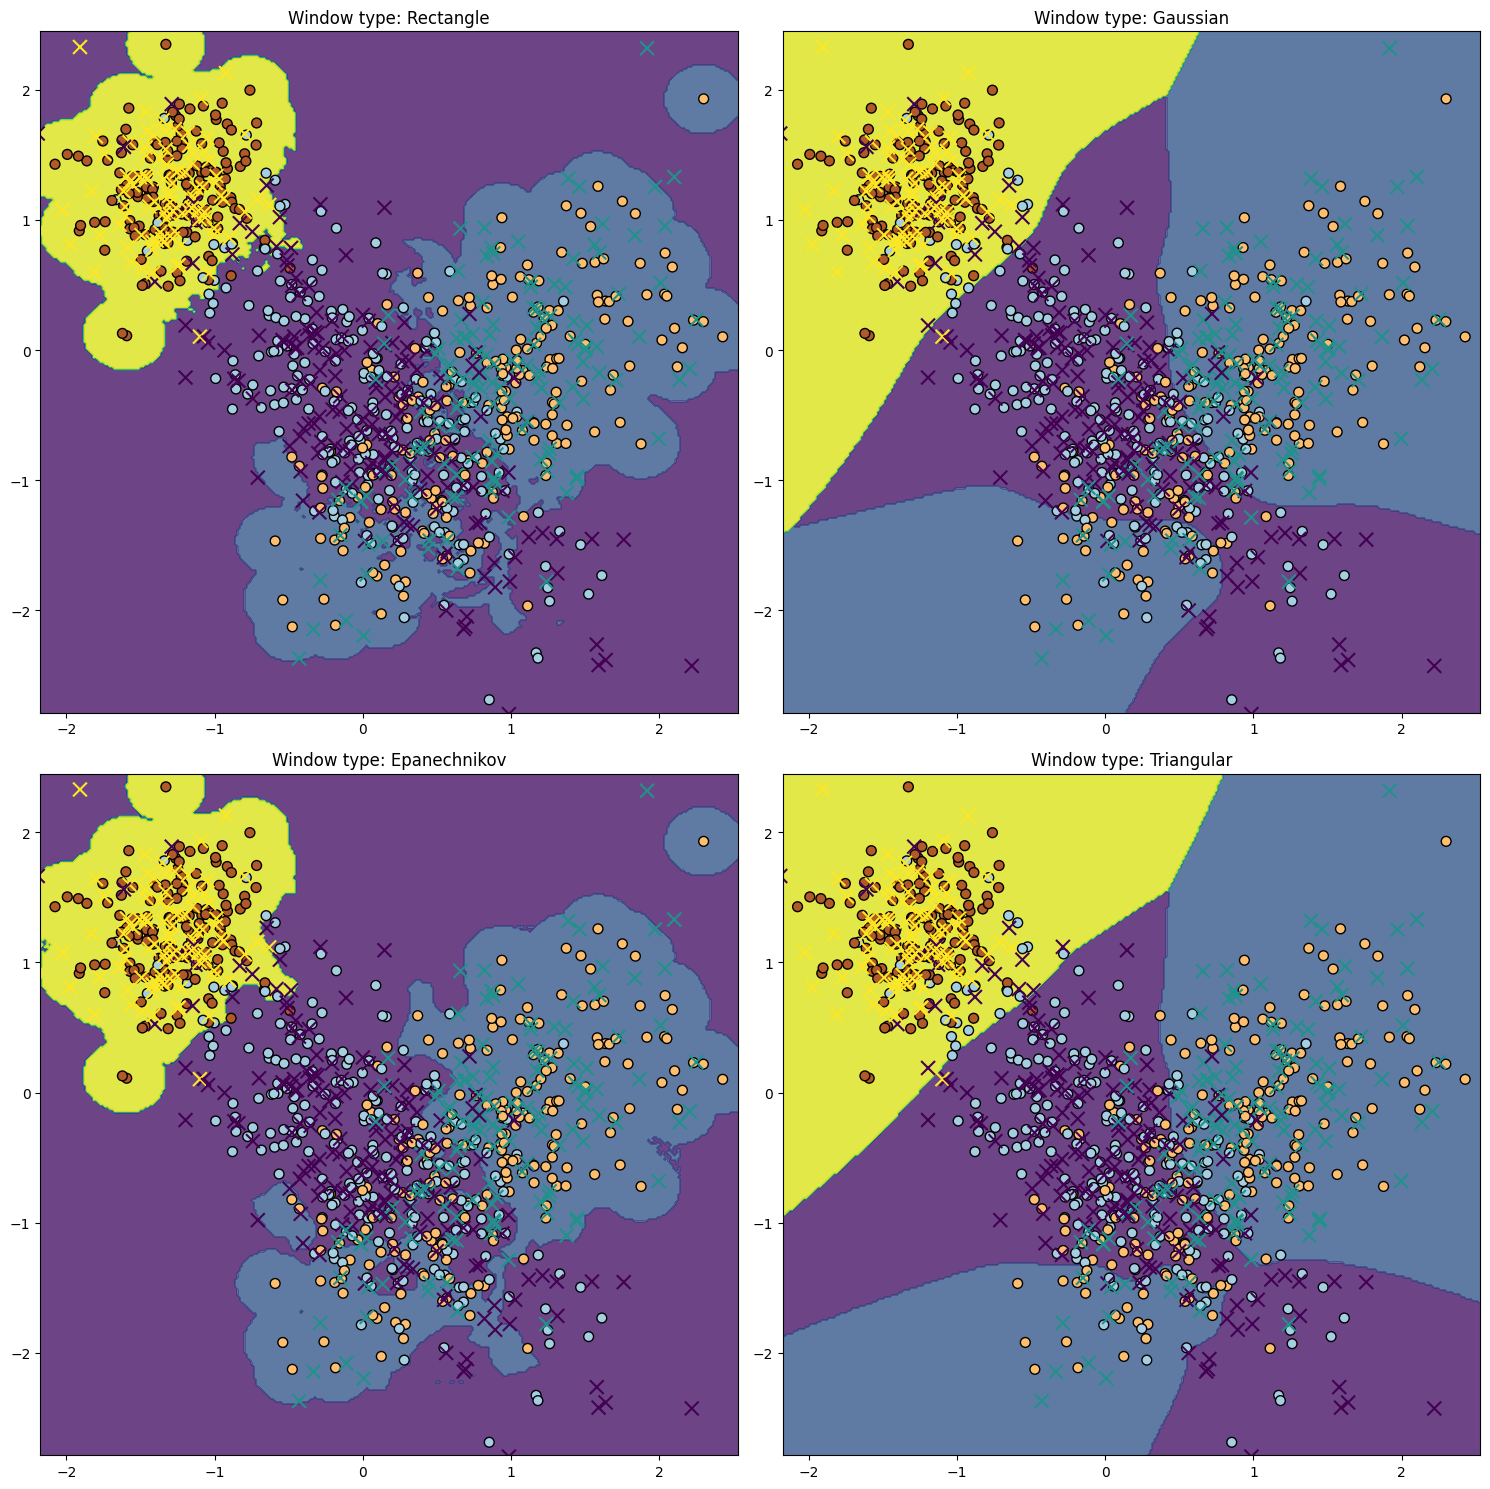

In [ ]:
plt.figure(figsize=(15, 15))

for i, label in enumerate(labels, 1):
    plt.subplot(2, 2, i)
    Z = np.exp(window_predictors[label].predict_class_array(np.c_[np.ravel(xx), np.ravel(yy)]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', s=50, cmap=plt.cm.Paired)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', s=100)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(f'Window type: {label}')

plt.tight_layout()
plt.show()

# **MICRO-AVERAGED И MACRO-AVERAGED ROC И PR КРИВЫЕ. MICRO-AVERAGED И MACRO-AVERAGED ROC И PR AUC**

Так как многие используемые методы библиотеки sklearn работают только с бинаризированными данными, был использован метод LabelBinarizer для бинаризации исследоумемой многоклассовой выборки, позволяющий в дальнейшем использовать One-vs-All метод. Этот метод заключается в создании бинарных классификаторов для каждого класса, и в дальнейшем, чтобы сделать прогноз для новых данных, каждый классификатор предсказывает вероятность принадлежности объекта к своему классу, и выбирается класс с наибольшей вероятностью, что позволяет противопоставить один класс остальным для графического представления таких показателей предсказания как TPR и FPR.

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve, roc_auc_score

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

Также были написаны необходимые для подсчета PR и RECALL показателей функции pr_recall_curve и macro_pr_recall_curve

In [ ]:
def pr_recall_curve(y_true, y_pred):
    order = np.argsort(y_pred)[::-1]
    y_true = y_true[order]

    tp = np.cumsum(y_true == 1)
    fp = np.cumsum(y_true == 0)

    precision = tp / (tp + fp)
    recall = tp / tp[-1]

    return precision, recall

def macro_pr_recall_curve(preds, true_labels):
    n_classes = true_labels.shape[1]
    precisions = []
    recalls = []

    for i in range(n_classes):
        precision = []
        recall = []

        for threshold in np.linspace(0, 1, 100):
            pred_labels = np.where(preds[:, i] >= threshold, 1, 0)

            true_positives = np.sum(np.logical_and(pred_labels == 1, true_labels[:, i] == 1))
            false_positives = np.sum(np.logical_and(pred_labels == 1, true_labels[:, i] == 0))
            false_negatives = np.sum(np.logical_and(pred_labels == 0, true_labels[:, i] == 1))

            if true_positives + false_positives == 0:
                precision.append(0)
            else:
                precision.append(true_positives / (true_positives + false_positives))

            if true_positives + false_negatives == 0:
                recall.append(0)
            else:
                recall.append(true_positives / (true_positives + false_negatives))

        precisions.append(precision)
        recalls.append(recall)

    precision_macro = np.mean(np.array(precisions), axis=0)
    recall_macro = np.mean(np.array(recalls), axis=0)
    return precision_macro, recall_macro

**macro-averaged и micro-averaged PR-кривые и PR AUC**



In [ ]:
def plot_PRcurve(y_onehot_test, y_score, kernel):
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(3):
        precision[i], recall[i] = pr_recall_curve(y_onehot_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_onehot_test[:, i], y_score[:, i])

    # Расчет micro-averaged precision и recall
    precision["micro"], recall["micro"] = pr_recall_curve(y_onehot_test.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(y_onehot_test, y_score, average="micro")

    # Расчет macro-averaged precision и recall
    precision["macro"], recall["macro"] = macro_pr_recall_curve(y_score, y_onehot_test)
    # Строим PR-кривые
    macro_roc_auc_ovr = roc_auc_score(
        y_onehot_test,
        y_score,
        multi_class="ovr",
        average="macro",
    )
    plt.figure()
    plt.step(recall['micro'], precision['micro'], where='post', color='b', alpha=0.5, label='Micro-average PR curve (AP = {0:0.3f})'
             ''.format(average_precision["micro"]))
    plt.fill_between(recall['micro'], precision['micro'], alpha=0.2, color='b')

    plt.step(recall['macro'], precision['macro'], where='post', color='g', alpha=0.5, label=f'Macro-average PR curve (AP = {macro_roc_auc_ovr:.3f})')
    plt.fill_between(recall["macro"], precision["macro"], alpha=0.2, color='g')

    colors = ['r', 'm', 'c']
    for i, color in zip(range(3), colors):
        plt.step(recall[i], precision[i], color=color, alpha=0.5, where='post',
                 label='PR curve of class {0} (AP = {1:0.3f})'
                 ''.format(i + 1, average_precision[i]))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall curve for multi-class classification\nKERNEL TYPE: {kernel}')
    plt.legend()
    plt.show()

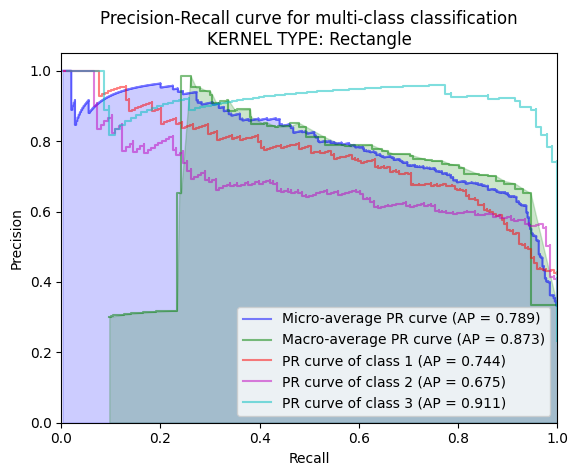

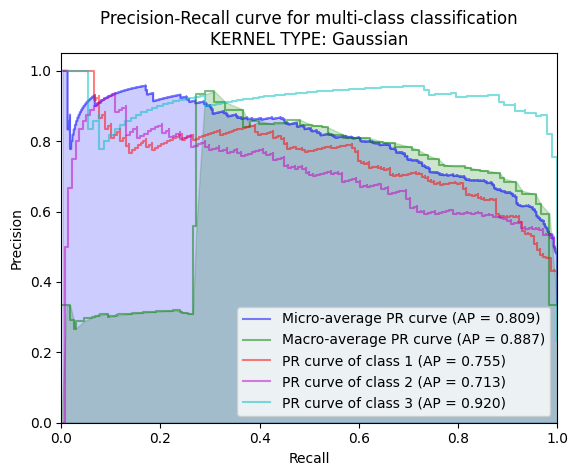

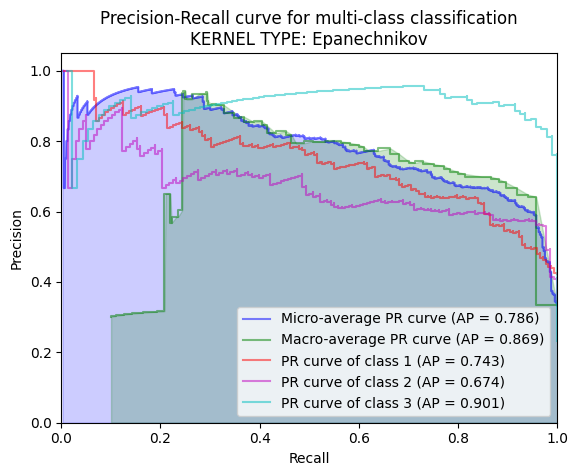

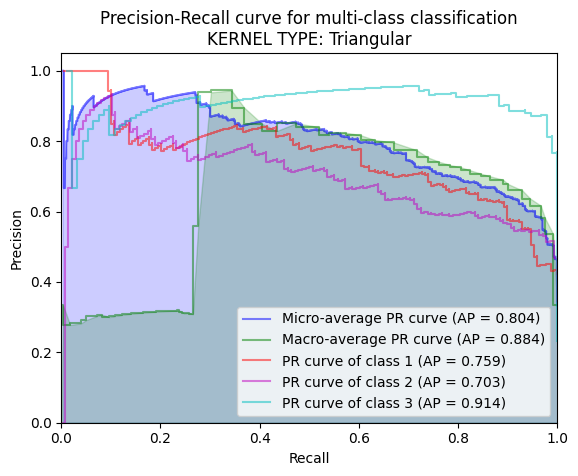

In [ ]:
for label in labels:
    y_score = window_predictors[label].predict_proba(X_test)
    plot_PRcurve(y_onehot_test, y_score, label)

**macro-averaged и micro-averaged ROC-кривые и ROC AUC**

Предварительно были написаны необходимые для подсчета TPR и FPR показателей функции micro_fpr_tpr и macro_fpr_tpr.

In [ ]:
from sklearn.metrics import auc, roc_curve
def micro_fpr_tpr(y_onehot_test, y_score, n_classes):
    return roc_curve(y_onehot_test.ravel(), y_score.ravel())


def macro_fpr_tpr(y_true, y_score, n_classes):
    all_fpr = np.unique(np.concatenate([roc_curve(y_true[:, i], y_score[:, i])[0] for i in range(n_classes)]))
    mean_tpr = 0.0

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
        mean_tpr += np.interp(all_fpr, fpr, tpr)

    mean_tpr /= n_classes

    return all_fpr, mean_tpr

In [ ]:
from itertools import cycle

def plot_characteristic(n_classes, y_onehot_test, y_score, micro_fpr, micro_tpr, macro_fpr, macro_tpr, name_label = None):
    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        micro_fpr,
        micro_tpr,
        label=f"micro-average ROC curve (AUC = {auc(micro_fpr, micro_tpr):.3f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        macro_fpr,
        macro_tpr,
        label = f"macro-average ROC curve (AUC = {auc(macro_fpr, macro_tpr):.3f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {class_id + 1}",
            color=color,
            ax=ax
        )

    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass | kernel type: {label}",
    )

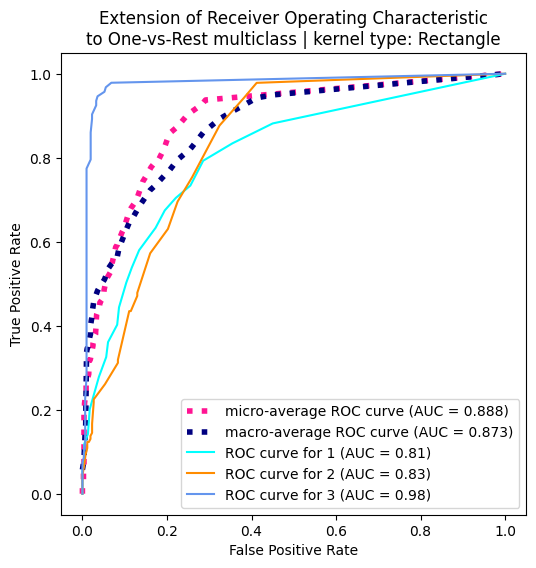

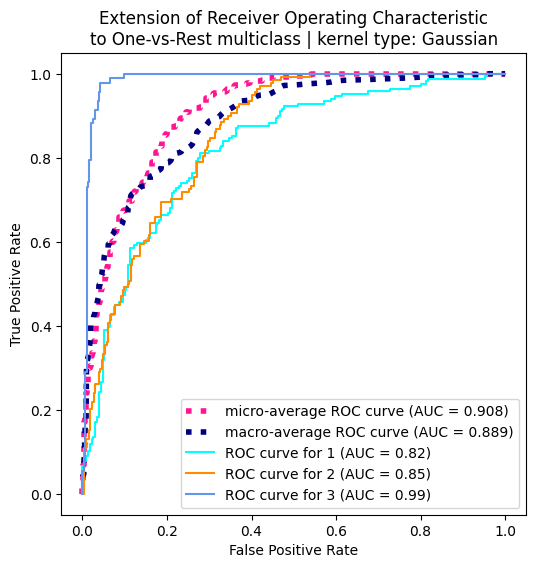

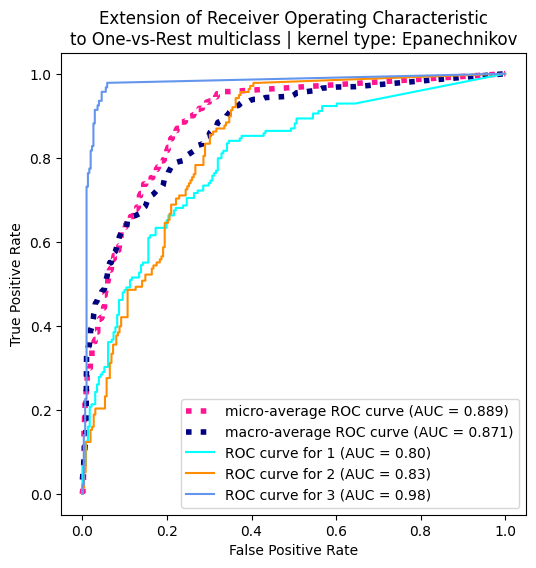

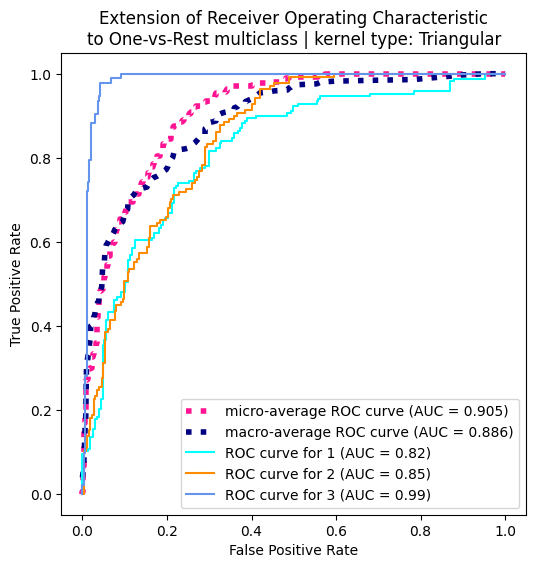

In [ ]:
micro_macro_d = {label: {'micro': {'fpr': None, 'tpr': None}, 'macro': {'fpr': None, 'tpr': None}} for label in labels}

for label in labels:
    y_score = window_predictors[label].predict_proba(X_test)
    micro_macro_d[label]['micro']['fpr'], micro_macro_d[label]['micro']['tpr'], _ = micro_fpr_tpr(y_onehot_test, y_score, 3)
    micro_macro_d[label]['macro']['fpr'], micro_macro_d[label]['macro']['tpr'] = macro_fpr_tpr(y_onehot_test, y_score, 3)

    micro_fpr, micro_tpr = micro_macro_d[label]['micro']['fpr'], micro_macro_d[label]['micro']['tpr']
    macro_fpr, macro_tpr = micro_macro_d[label]['macro']['fpr'], micro_macro_d[label]['macro']['tpr']

    plot_characteristic(3, y_onehot_test, y_score, micro_fpr, micro_tpr, macro_fpr, macro_tpr, label)

# **ОБУЧЕНИЕ ПАРАМЕТРИЧЕСКОГО БАЙЕСОВСКОГО КЛАССИФИКАТОРА**

Для обучения байесовского классификатора был использовал метод GaussianNB из библиотеки sklearn, а также модуль cross_val_score для разбиения выборки на фолды с дальнейшим обучением.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print(f'Accuracy на тестовой выборке: {accuracy}')
print(f'Среднее значение точности (accuracy) по фолдам: {scores.mean()}')
print(f'Стандартное отклонение точности (accuracy) по фолдам: {scores.std()}')

Accuracy на тестовой выборке: 0.7925
Среднее значение точности (accuracy) по фолдам: 0.7616666666666667
Стандартное отклонение точности (accuracy) по фолдам: 0.030092450142113


In [ ]:
# для сравнения возьмем лучший показатель среди всех парзеновских окон (Gaussian type)
print('Accuracy на тестовой выборке:', accuracy_score(y_test, window_predictors['Gaussian'].predict_class_array(X_test)))
print('Среднее значение точности (accuracy) по фолдам:', list(best_res.values())[2], '\nСтандартное отклонение точности (accuracy) по фолдам:', list(best_res.values())[3])

Accuracy на тестовой выборке: 0.8425
Среднее значение точности (accuracy) по фолдам: 0.7866666666666666 
Стандартное отклонение точности (accuracy) по фолдам: 0.03762386949205989


# **ИССЛЕДОВАНИЕ ПОСТРОЕННЫХ МОДЕЛЕЙ**

Оценка влияния априорных вероятностей классов на границы и показатели качества классификации.

In [ ]:
from mlxtend.plotting import plot_decision_regions
import random

def plot_regions(X_test, y_test, model, title):
  plot_decision_regions(X = X_test, y = y_test.astype('int32'), clf = model, feature_index = [0, 1])
  plt.title(title)


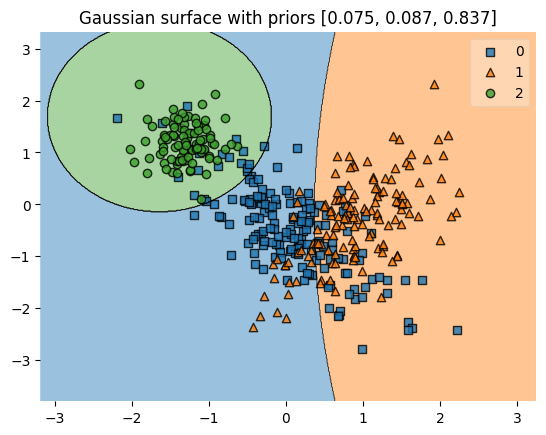

Значение accuracy:  0.77


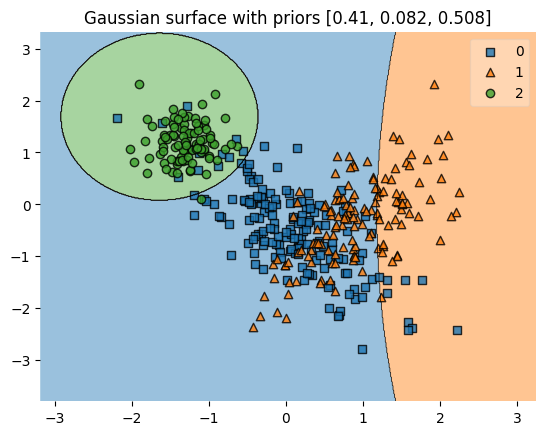

Значение accuracy:  0.7075


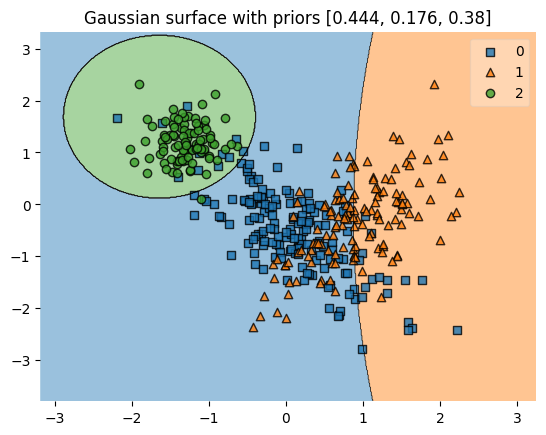

Значение accuracy:  0.745


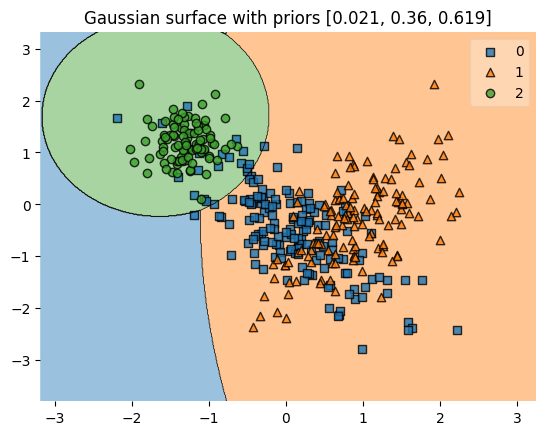

Значение accuracy:  0.58


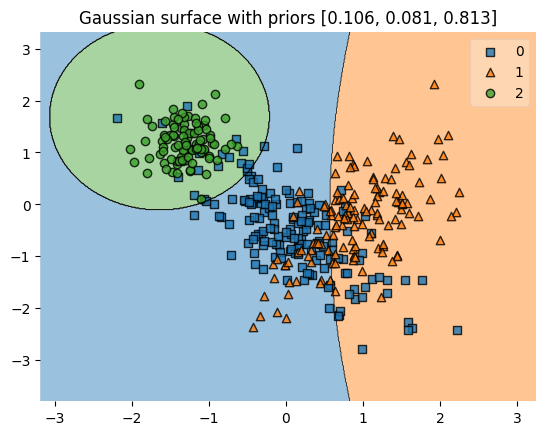

Значение accuracy:  0.7825


In [ ]:
for i in range(5):
  first_num = random.random()/2
  second_num = random.random()/2
  priors = [first_num, second_num, 1 - (first_num + second_num)]
  model = GaussianNB(priors = priors).fit(X_train, y_train)
  plot_regions(X_test, y_test, model, f'Gaussian surface with priors {[round(prior, 3) for prior in priors]}')
  plt.show()
  print('Значение accuracy: ', accuracy_score(y_test, model.predict(X_test)))

Для сравнения непараметрических и параметрических байесовских классификаторов возьмем модель с параметром парзеновского окна типа Гауссовское, так как оно показало лучшие результаты среди всех окон.

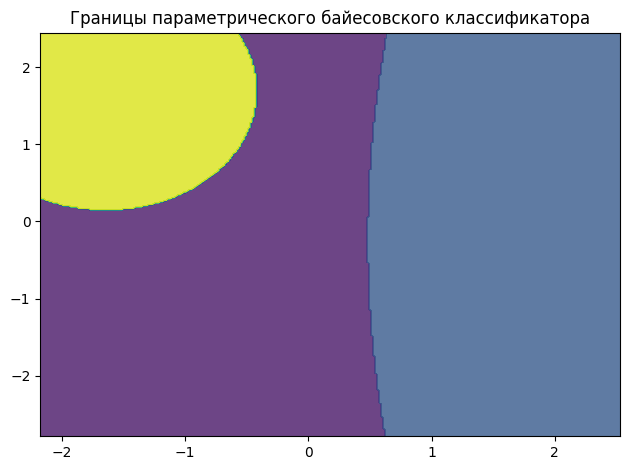

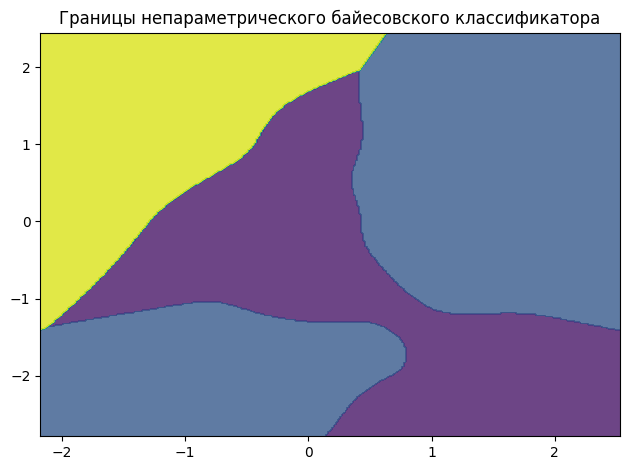

In [ ]:
krnl = window_predictors['Gaussian']
for model in [clf, krnl]:
  if model == clf:
    title = 'Границы параметрического байесовского классификатора'
    Z = np.exp(clf.predict(np.c_[np.ravel(xx), np.ravel(yy)]))
  else:
    title = 'Границы непараметрического байесовского классификатора'
    Z = np.exp(model.predict_class_array(np.c_[np.ravel(xx), np.ravel(yy)]))
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.8)

  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)

  plt.title(title)
  plt.tight_layout()
  plt.show()

# **ВЫВОДЫ О ВЛИЯНИИ ШИРИНЫ И ВИДА ПАРЗЕНОВСКОГО ОКНА НА ТОЧНОСТЬ**

Из главы ОБУЧЕНИЕ МОДЕЛИ НЕПАРАМЕТРИЧЕСКИХ БАЙЕСОВСКИХ КЛАССИФИКАТОРОВ пункта 3 можно сделать следующие выводы по каждому виду парзеновского окна:

**Прямоугольное**. Функция зависимости точности от ширины достигает своего максимума при значении лямбда равном примерно 2

**Гауссовское**. Функция зависимости точности от ширины достигает своего максимума при значении лямбда равном примерно 0.5

**Епанечникова**. Функция зависимости точности от ширины достигает своего максимума при значении лямбда равном примерно 2

**Треугольного**. Функция зависимости точности от ширины достигает своего максимума при значении лямбда равном примерно 0.5

Лучше всех себя показал тип Гауссовского окна, окна Епанечникова и треугольный тип окна, хуже всего себя показал тип прямоугольного окна.

Ниже приведены науилучшие результаты для каждого из типов.


In [ ]:
for label in labels:
  print(f'KERNEL TYPE: {label} | LAMBDA: {best_res_each_kernel[label]["LAMBDA"]} | MEAN: {best_res_each_kernel[label]["MEAN"]}')

KERNEL TYPE: Rectangle | LAMBDA: 2.0 | MEAN: 0.6945
KERNEL TYPE: Gaussian | LAMBDA: 0.5 | MEAN: 0.7866666666666666
KERNEL TYPE: Epanechnikov | LAMBDA: 2.0 | MEAN: 0.7866666666666666
KERNEL TYPE: Triangular | LAMBDA: 0.5 | MEAN: 0.7866666666666666


# **ОБУЧЕНИЕ МОДЕЛИ ЛОГИЧТИЧЕСКОЙ РЕГРЕССИИ**


In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression().fit(X_train, y_train)
accuracy = accuracy_score(y_test, lg.predict(X_test))
cr = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

print(f'Accuracy на тестовой выборке: {accuracy}')
print(f'Среднее значение точности (accuracy) по фолдам: {cr.mean()}')
print(f'Стандартное отклонение точности (accuracy) по фолдам: {cr.std()}')

Accuracy на тестовой выборке: 0.79
Среднее значение точности (accuracy) по фолдам: 0.7649999999999999
Стандартное отклонение точности (accuracy) по фолдам: 0.026034165586355535


Для сравнения возьмем лучший показатель среди всех парзеновских окон (Gaussian type)

In [ ]:
print('Accuracy на тестовой выборке:', accuracy_score(y_test, window_predictors['Gaussian'].predict_class_array(X_test)))
print('Среднее значение точности (accuracy) по фолдам:', list(best_res.values())[2], '\nСтандартное отклонение точности (accuracy) по фолдам:', list(best_res.values())[3])

Accuracy на тестовой выборке: 0.8425
Среднее значение точности (accuracy) по фолдам: 0.7866666666666666 
Стандартное отклонение точности (accuracy) по фолдам: 0.03762386949205989


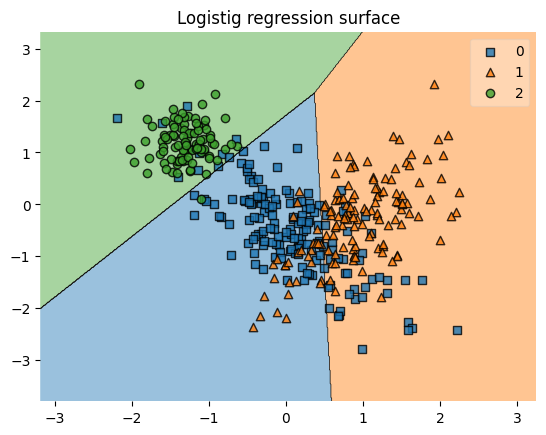

In [ ]:
plot_regions(X_test, y_test, lg, title='Logistig regression surface')

Оценим границы, созданные логистической регрессией

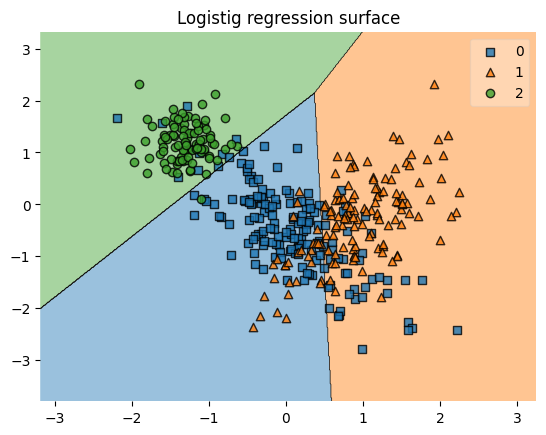

In [ ]:
plot_regions(X_test, y_test, lg, title='Logistig regression surface')

# **ВЫВОД**

В ходе работы были получены следующие основные результаты и выводы:

1. Обучение непараметрических байесовских классификаторов: Были успешно обучены непараметрические байесовские классификаторы на сгенерированных данных. Эти модели показали хорошую способность разделять классы и демонстрировали довольно высокую точность предсказаний.

2. Анализ показателей непараметрических байесовских классификаторов: Проведенный анализ показал, что непараметрические байесовские классификаторы обладают высокой чувствительностью к ширине и типу парзеновского окна, что делает их эффективным инструментом для задач классификации.

3. Сравнение с другими моделями: Проведенное сравнение непараметрических байесовских классификаторов с моделями параметрических байесовских классификаторов и логистической регрессии показало, что дання модель превосходит выше указанные по точности предсказаний, что значит, ее применение для машинного обучения оправдано.

Предложения для дальнейших исследований в данной области:

1. Исследование комбинации моделей: Провести исследование по комбинированию непараметрических байесовских классификаторов с другими типами моделей для улучшения общей производительности и точности предсказаний.

2. Расширение выборки данных: Попробовать обучить непараметрические байесовские классификаторы на более крупных выборках данных для оценки их обобщающей способности и стабильности.

3. Исследование новых признаков: Исследовать возможность включения новых признаков в модель для улучшения ее производительности и адаптации к различным типам данных.

Дальнейшие исследования в указанных направлениях могут значительно расширить наше понимание эффективности непараметрических байесовских классификаторов и привести к созданию более точных и универсальных моделей для решения различных задач классификации.

Данное исследование может помочь студентам и другим обучающимся в понимании и применении непараметрических байесовских классификаторов.
